In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import h5py
from scipy.io import loadmat
import scipy.signal as sg
from scipy.integrate import simps
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import csv

sleep = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep.isna().sum()
# sleep.info()


Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [2]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


<AxesSubplot:>

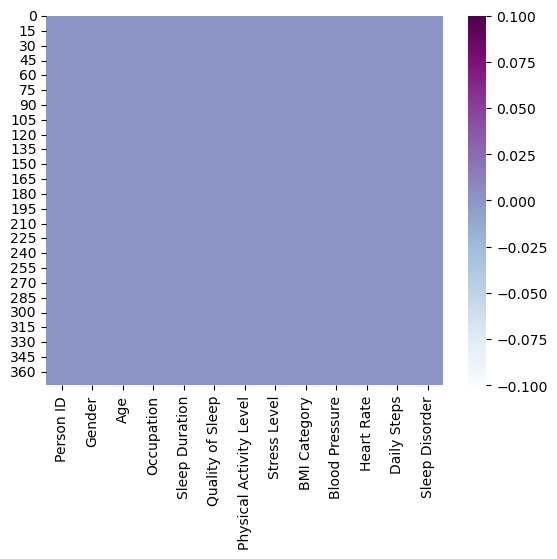

In [3]:
sns.heatmap(sleep.isna(),cmap='BuPu')

In [4]:
sleep.keys()

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [5]:
bp_unique = sleep['Blood Pressure'].unique()

In [6]:
sleep['Blood Pressure']=sleep['Blood Pressure'].apply(lambda x:0 if x in bp_unique else 1)

In [7]:
sleep['Gender']=sleep['Gender'].apply(lambda x:0 if x in ['Female'] else 1)

In [8]:
columns_to_bin = ["Age", "Heart Rate", "Daily Steps", "Sleep Duration", "Physical Activity Level"]

for col in columns_to_bin:
    sleep[col] = pd.cut(sleep[col], bins=4)

# sleep["Age"]=pd.digitize(sleep["Age"],bins=[min_age, max_age])
# sleep["Heart Rate"]=pd.digitize(sleep["Heart Rate"],bins=[bin1, bin2, bin3, bin4])
# sleep["Daily Steps"]=pd.digitize(sleep["Daily Steps"],4)
# sleep["Sleep Duration"]=pd.digitize(sleep["Sleep Duration"],3)
# sleep["Physical Activity Level"]=pd.digitize(sleep["Physical Activity Level"],4)

In [9]:
from sklearn.preprocessing import LabelEncoder #for converting non-numeric data (String or Boolean) into numbers
LE=LabelEncoder()

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    sleep[label]=LE.fit_transform(sleep[label])

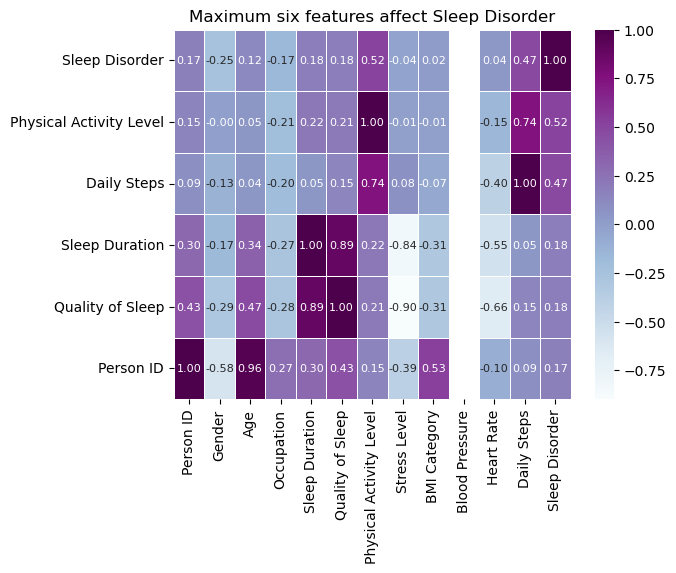

In [10]:
correlation=sleep.corr()
max_6_corr=correlation.nlargest(6,"Sleep Disorder")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Maximum six features affect Sleep Disorder')
plt.show()

In [11]:
x=sleep.iloc[:,:-1]
y=sleep.iloc[:,-1]

x_shape= x.shape
y_shape=y.shape
print('The dimensions of x is : ',x_shape)
print('The dimensions of y is : ',y_shape)

The dimensions of x is :  (374, 12)
The dimensions of y is :  (374,)


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=32,shuffle=True)

In [13]:
x_train_shape= x_train.shape
x_test_shape= x_test.shape
y_train_shape= y_train.shape
y_test_shape= y_test.shape

print("x train dimensions :",x_train_shape)
print("x test dimensions: ",x_test_shape)
print("y train dimensions :",y_train_shape)
print("y test dimensions :",y_test_shape)

x train dimensions : (299, 12)
x test dimensions:  (75, 12)
y train dimensions : (299,)
y test dimensions : (75,)


In [14]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(x_train,y_train)

/Users/aishwaryarajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
LR_training_score= round(LR.score(x_train,y_train)*100,2)
LR_testing_score= round(LR.score(x_test,y_test)*100,2)

print(f"LR training score :",LR_training_score)
print("LR testing score :",LR_testing_score)

LR training score : 88.63
LR testing score : 89.33


In [16]:
LR_y_pred=LR.predict(x_test)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier().fit(x_train,y_train)

In [18]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(x_train, y_train)

GBC_training_score=round(GBC.score(x_train,y_train)*100,2)
GBC_testing_score=round(GBC.score(x_test,y_test)*100,2)

print("GBC training score :",GBC_training_score)
print("GBC testing score :",GBC_testing_score)

GBC training score : 100.0
GBC testing score : 89.33


In [19]:
GBC_y_pred=gbc_model.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix

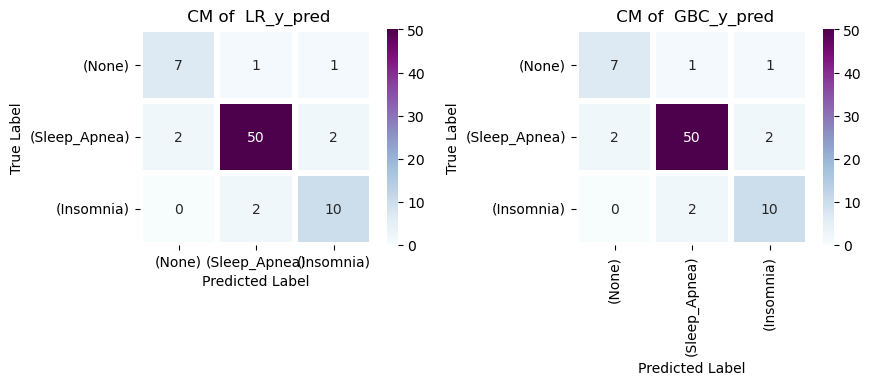

In [21]:
#looks at sensitivity TD/TP

models_predictions=[LR_y_pred,GBC_y_pred]
model={1:'LR_y_pred',2:'GBC_y_pred'}


plt.figure(figsize=(15,7))
for i,y_pred in enumerate(models_predictions,1) :
    
    cm = confusion_matrix(y_pred,y_test)
    
    plt.subplot(2,3,i)
    sns.heatmap(cm,cmap='BuPu',linewidth=3,fmt='',annot=True,
                xticklabels=['(None)','(Sleep_Apnea)','(Insomnia)'],
                yticklabels=['(None)','(Sleep_Apnea)','(Insomnia)'])
    
    
    plt.title(' CM of  '+ model[i])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)



#ground truth classesa and module predictive class

In [22]:
# import numpy as np
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# x_train, x_val, y_train, y_val = train_test_split(x, y)

# # try a big number for n_estimator
# gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100)
# gbrt.fit(x_train, y_train)

# # calculate error on validation set
# errors = [mean_squared_error(y_val, y_pred)
#  for y_pred in gbrt.staged_predict(x_val)]

# bst_n_estimators = np.argmin(errors) + 1
# gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
# gbrt_best.fit(x_train, y_train)

In [23]:
# #importing the libraries
# from sklearn.ensemble import GradientBoostingClassifier

# #loading and preparing data 
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=32,shuffle=True)

# #Create an instance of the GradientBoostingClassifier and train it using your training data.
# gbc_model = GradientBoostingClassifier()
# gbc_model.fit(x_train, y_train)

# # Assuming X_test contains the features of your test data
# predictions = gbc_model.predict(x_test)

# #evaluation method

# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

In [24]:
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform, randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.001, 0.01),
    'max_depth': randint(3, 6)
}

# Create the GBC model
gbc_model = GradientBoostingClassifier()

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(gbc_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Fit the model on your training data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)



Best Hyperparameters: {'learning_rate': 0.005560699842170359, 'max_depth': 5, 'n_estimators': 100}
Best Accuracy: 0.9064983164983165


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.003660699842170359],
    'max_depth': [5]
}

# Create the GBC model
gbc_model = GradientBoostingClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(gbc_model, param_grid, cv=3, scoring='accuracy')

# Fit the model on your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [27]:
# Create a new GBC model with the best hyperparameters

from sklearn.ensemble import GradientBoostingClassifier

best_gbc_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth']
)

# gbc_model = GradientBoostingClassifier()
# Fit the best model on your training data
best_gbc_model.fit(x_train, y_train)

# Make predictions using the best model
predictions = best_gbc_model.predict(x_test)
# feature_importances = gbc_model.feature_importances_

print(predictions)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

[1 1 2 1 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 2 1 0 1 1 2 1 1 1 1 1 2 1 2
 1 1 1 1 1 1 1 2 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 2 1 1 1 1 0 1 2 1 1 2 1 1
 1]
Accuracy: 0.9066666666666666


In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier

# Assuming X_train and y_train are your training data
gbc_model = GradientBoostingClassifier()

# Fit the model to your training data
gbc_model.fit(x_train, y_train)

# Now you can use methods and attributes of the model without encountering NotFittedError
predictions = gbc_model.predict(x_test)
feature_importances = gbc_model.feature_importances_

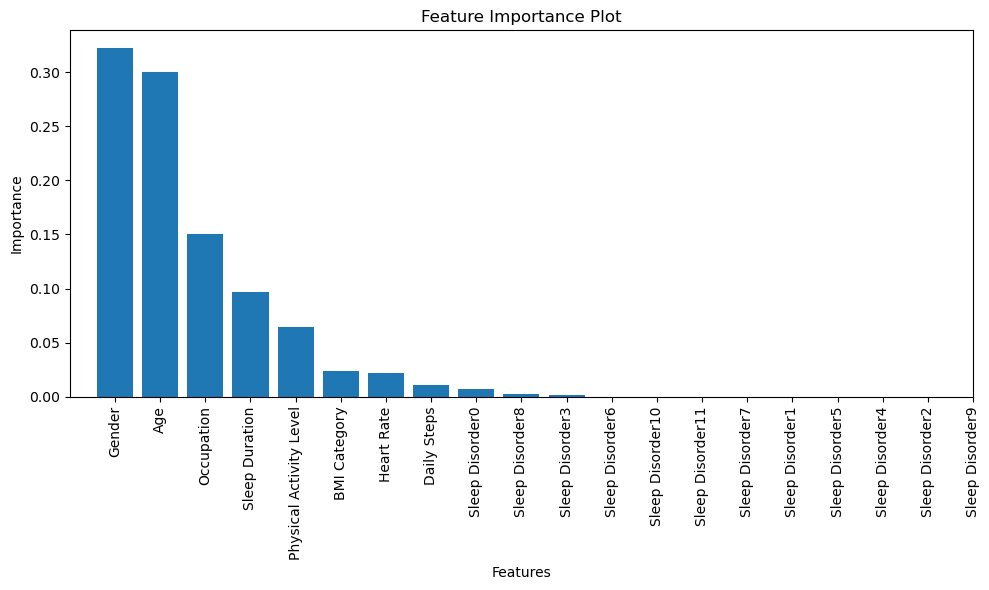

In [29]:
import matplotlib.pyplot as plt

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]

# Names of features
feature_names = ['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps'] + ['Sleep Disorder' + str(i) for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier  # or your chosen model

In [31]:
model = GradientBoostingClassifier()  # or your chosen model
predictions = cross_val_predict(model, x, y, cv=5)  # 5-fold CV

In [32]:
df_with_predictions = pd.DataFrame({'Gender': x['Age'], x['Occupation']: x['Sleep Duration'], x['Quality of Sleep'], x['Physical Activity Level', x['BMI Category'],x['Quality of Sleep'], x['Blood Pressure']] 'Predictions': predictions})

SyntaxError: invalid syntax (391597738.py, line 1)

In [ ]:
#predictive accuracy when you have class imbalance 

#doctors rely on info given to them  anyways

#so long as we dont have false positives, it is ok so predictive accuracy